In [1]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 13.0 MB/s eta 0:00:00


In [2]:
import mediapipe as mp
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [3]:
file = "/content/hand.png"

In [4]:
img = cv2.imread(file)
img2= np.copy(img)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [5]:
mp_hand = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

In [10]:
hand = mp_hand.Hands(static_image_mode=True, max_num_hands=1)

In [7]:
results = hand.process(img_rgb)

In [8]:
print(len(results.multi_hand_landmarks))

1


In [11]:
landmarks = results.multi_hand_landmarks[0]

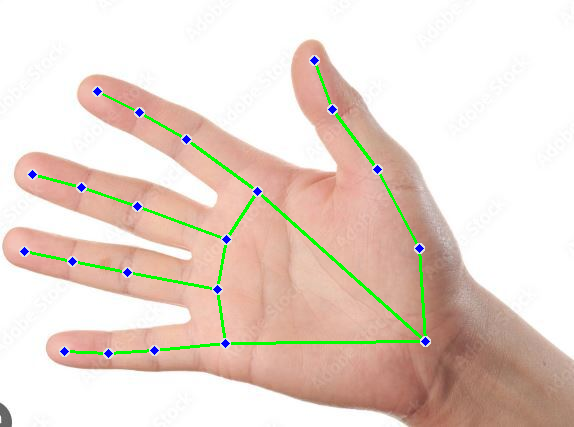

In [12]:
mp_drawing.draw_landmarks(
        img2,
        landmarks,
        mp_hand.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec((255, 0, 0), thickness=3, circle_radius=2),
        mp_drawing.DrawingSpec((0, 255, 0), thickness=2, circle_radius=2))
cv2_imshow(img2)

In [13]:
hand_landmarks = results.multi_hand_landmarks[0].landmark
print(hand_landmarks[mp_hand.HandLandmark.THUMB_TIP])

x: 0.5474013090133667
y: 0.14165639877319336
z: -0.10646679997444153



In [14]:
thumb_tip = hand_landmarks[mp_hand.HandLandmark.PINKY_TIP]
index_tip = hand_landmarks[mp_hand.HandLandmark.INDEX_FINGER_TIP]

In [15]:
landmarks = results.multi_hand_landmarks[0].landmark
if landmarks:
  for landmark in landmarks:
    print(landmark)

x: 0.7411414384841919
y: 0.8006923198699951
z: 8.70999144808593e-07

x: 0.7316845655441284
y: 0.5828514099121094
z: -0.06061888113617897

x: 0.6573441028594971
y: 0.3967650234699249
z: -0.07884372770786285

x: 0.5784536004066467
y: 0.2553780674934387
z: -0.09273842722177505

x: 0.5474013090133667
y: 0.14165639877319336
z: -0.10646679997444153

x: 0.4488781988620758
y: 0.4486999213695526
z: -0.03534339740872383

x: 0.32431983947753906
y: 0.3270847201347351
z: -0.06413911283016205

x: 0.2431355118751526
y: 0.26379936933517456
z: -0.09261855483055115

x: 0.16989344358444214
y: 0.21515405178070068
z: -0.11731836199760437

x: 0.3953683078289032
y: 0.5598266124725342
z: -0.03391925245523453

x: 0.2404084950685501
y: 0.483320027589798
z: -0.061820562928915024

x: 0.14127057790756226
y: 0.4400969445705414
z: -0.09450121968984604

x: 0.055892735719680786
y: 0.4084058105945587
z: -0.11955234408378601

x: 0.3786487579345703
y: 0.6774039268493652
z: -0.04043598473072052

x: 0.2221219390630722
y: 0

In [16]:
thumb = landmarks[mp_hand.HandLandmark.THUMB_TIP]
index = landmarks[mp_hand.HandLandmark.INDEX_FINGER_TIP]

thumb_pos = tuple(np.multiply([thumb.x, thumb.y], [img.shape[1], img.shape[0]]).astype(int))
index_pos = tuple(np.multiply([index.x, index.y], [img.shape[1], img.shape[0]]).astype(int))
middle_pos = (abs((thumb_pos[0] + index_pos[0]) // 2), abs((thumb_pos[1] + index_pos[1]) // 2))

print(thumb_pos)
print(index_pos)
print(middle_pos)

(314, 60)
(97, 91)
(205, 75)


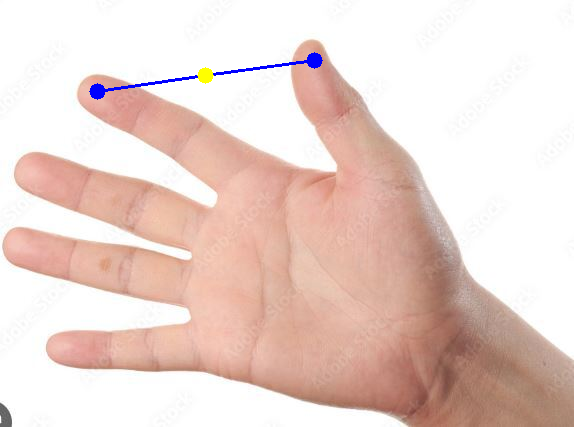

In [17]:
cv2.circle(img, (thumb_pos[0], thumb_pos[1]), 8, (255,0,0),  -1)
cv2.circle(img, (index_pos[0], index_pos[1]), 8, (255,0,0),  -1)
cv2.line(img, thumb_pos, middle_pos, (255, 0, 0), 2)
cv2.line(img, middle_pos, index_pos, (255,0,0), 2)
cv2.circle(img, (middle_pos[0], middle_pos[1]), 8, (0,255,255),  -1)
cv2_imshow(img)

219


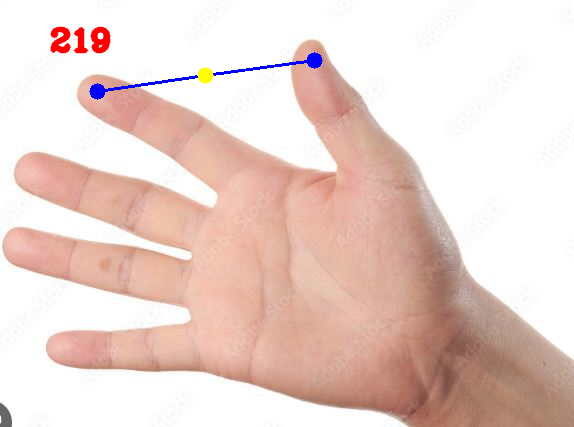

In [18]:
thumb_x, thumb_y = (thumb_pos[0], thumb_pos[1])
index_x, index_y = (index_pos[0], index_pos[1])
distance = ((index_x - thumb_x) ** 2 + (index_y - thumb_y) ** 2) ** 0.5
print(int(distance))
cv2.putText(img, f'{int(distance)}', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 4, cv2.LINE_AA)
cv2_imshow(img)